In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import cufflinks as cf
#cf.go_offline()

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.feature_selection import SelectFromModel
#from sklearn.preprocessing import StandardScaler, Imputer

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2

from sklearn.feature_selection import f_classif, f_regression

from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
from sklearn import utils

from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [94]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVR, SVC

import scipy.stats as stats 

from sklearn.preprocessing import FunctionTransformer, PowerTransformer 

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import RobustScaler

import xgboost as xgb

from sklearn.model_selection import learning_curve

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve

In [95]:
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy import arange
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [122]:
data = pd.read_excel('SVM-m - Copy.xlsx')
data.head()

,Surface_temperature,Concentration,Grip,Precipitation,Conductivity,Chemical,Snow_height,Base_temperature
0,0.379094,0.015162,0.971859,0.018224,0.500500,0.022255,0.153022,0.030556
1,0.379094,0.014596,0.971859,0.018224,0.500500,0.022255,0.142163,0.024645
2,0.382563,0.014596,0.971859,0.018224,0.500500,0.022255,0.142163,0.024645
3,0.389500,0.014879,0.971859,0.018224,0.512116,0.022255,0.142163,0.030556
4,0.386031,0.015445,0.971859,0.018224,0.523733,0.022255,0.142163,0.030556


In [123]:
X_train, X_test, y_train, y_test = train_test_split(data.drop
                                                    (labels='Chemical',axis=1),
                                                    data['Chemical'], 
                                                    test_size=0.3, random_state=0)

In [124]:
#from sklearn.tree import DecisionTreeRegressor

In [125]:
mse_values = []
for feature in X_train.columns:
    clf =SVR()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test, y_scored))

In [126]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=True)

Precipitation          0.009250
Snow_height            0.012075
Grip                   0.012151
Base_temperature       0.014187
Conductivity           0.014894
Surface_temperature    0.014985
Concentration          0.015534
dtype: float64

Text(0.5, 1.03, 'Importance of Variables for WRM (Salting)')

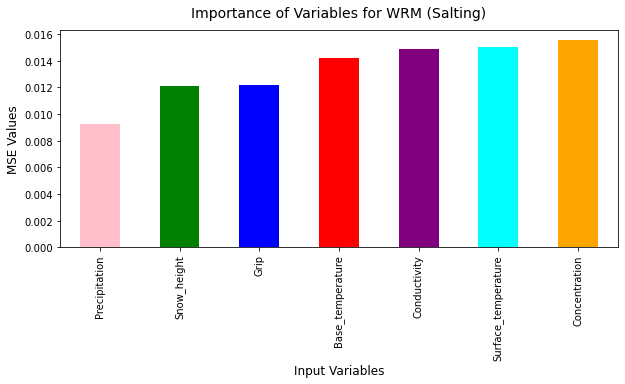

In [127]:
mse_values.sort_values(ascending=True).plot.bar(figsize=(10,4),color=['pink', 'green', 'blue', 'red', 
                                                                      'purple', 'cyan','orange'])

plt.ylabel('MSE Values', fontsize = 12)
plt.xlabel('Input Variables', fontsize = 12)
plt.title('Importance of Variables for WRM (Salting)', fontsize = 14, y = 1.03)